In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12,12)

Populating the interactive namespace from numpy and matplotlib


In [131]:
np.random.seed(0)

def Lloyd(numC, img):
    img = img.astype(int)
    imgColors = img.flatten()

    clusters_idx = np.random.choice(len(imgColors), numC, replace=False)
    cluster_means = imgColors[clusters_idx]
    ass = np.zeros(imgColors.shape[0]).astype(int)
    
    for i in range(20):
        #Assign points to cluster means
        for j in range(len(imgColors)):
            dists = np.zeros(numC)
            for k in range(numC):
                d = (cluster_means[k] - imgColors[j])**2
                dists[k] = d
            
            idx = np.argmin(np.array(dists))
            ass[j] = int(idx)
        
        #Update cluster means
        updated_means = np.zeros((numC,1))
        cluster_counts = np.zeros((numC,1))

        for j in range(len(imgColors)):
            idx = ass[j]
            updated_means[idx] += imgColors[j]
            cluster_counts[idx] += 1
        
        for j in range(numC):
            if cluster_counts[j] > 0:
                updated_means[j] /= cluster_counts[j]
                
        cluster_means = updated_means
    
    #Make new image
    new_img = np.zeros(imgColors.shape)
    for i in range(len(imgColors)):
        new_img[i] = cluster_means[ass[i]]
    
    return new_img.reshape(img.shape)    

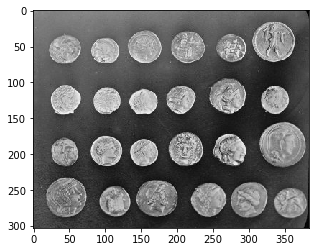

In [132]:
coins = cv2.imread('coins.png', 0)
plt.imshow(coins, cmap='gray')
plt.show()

new_img = Lloyd(2, coins)

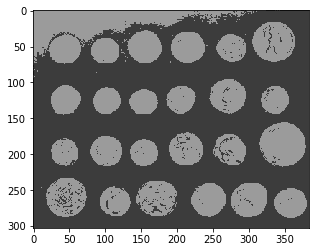

In [84]:
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [115]:
def Otsu(img):
    hist_count = [np.sum(img == i) for i in range(256)]
    S = np.sum(hist_count)
    P = hist_count / S
    thresh = -1
    iv_max = 0
    
    for t in range(256):
        w1 = np.sum(P[:t])
        w2 = np.sum(P[t:])
        
        mu1 = np.sum([i * P[i] for i in range(t)]) / w1 if w1 > 0 else 0
        mu2 = np.sum([i * P[i] for i in range(t, 256)]) / w2 if w2 > 0 else 0
        
        iv = w1 * w2 * (mu1 - mu2)**2
        
        if iv > iv_max:
            iv_max = iv
            thresh = t
    return thresh

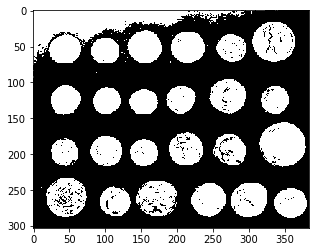

In [117]:
t = Otsu(coins)

plt.imshow(coins > t, cmap='gray')
plt.show()

In [156]:
def Cleaning(img, thresh, itr, neigh4=True):
    y_max, x_max = img.shape
    for k in range(itr):
        new_img = np.zeros(img.shape)
        for i in range(y_max):
            for j in range(x_max):
                if ((i - 1) > 0 and (i + 1) < y_max and (j - 1) > 0 and (j + 1) < x_max):
                    if (neigh4 == False):
                        vals = [img[i-1,j-1], img[i-1,j], img[i-1,j+1], 
                                img[i,j-1], img[i,j+1],
                                img[i+1,j-1], img[i+1,j], img[i+1,j+1]]
                    else:
                        vals = [img[i-1,j], 
                                img[i,j-1], img[i,j+1],
                                img[i+1,j]]

                    u, c = np.unique(vals, return_counts=True)
                    idx = np.argmax(u)
                    count = c[idx]
                    intensity = u[idx]
                    if (count > thresh):
                        new_img[i,j] = intensity
                    else:
                        new_img[i,j] = img[i,j]
        img = new_img
    return img

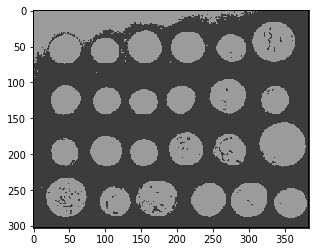

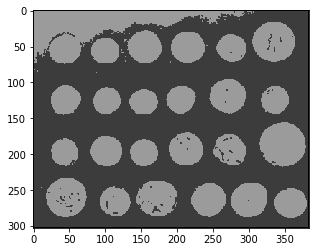

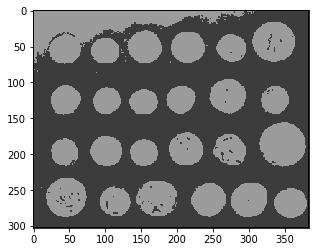

In [157]:
cleansed = Cleaning(new_img, 2, 1)

plt.imshow(cleansed, cmap='gray', vmin=0, vmax=255)
plt.show()

cleansed = Cleaning(new_img, 2, 5)

plt.imshow(cleansed, cmap='gray', vmin=0, vmax=255)
plt.show()

cleansed = Cleaning(new_img, 2, 10)

plt.imshow(cleansed, cmap='gray', vmin=0, vmax=255)
plt.show()

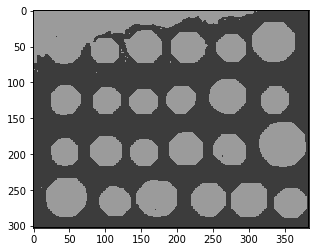

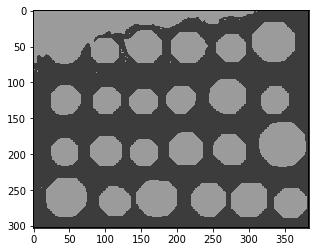

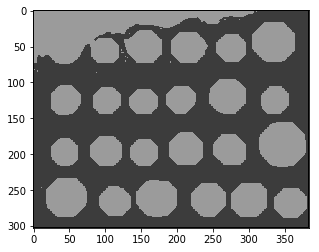

In [158]:
cleansed = Cleaning(new_img, 3, 5, neigh4=False)

plt.imshow(cleansed, cmap='gray', vmin=0, vmax=255)
plt.show()

cleansed = Cleaning(new_img, 3, 6, neigh4=False)

plt.imshow(cleansed, cmap='gray', vmin=0, vmax=255)
plt.show()

cleansed = Cleaning(new_img, 3, 7, neigh4=False)

plt.imshow(cleansed, cmap='gray', vmin=0, vmax=255)
plt.show()